In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in the pedestrian count data
pdcount = pd.read_csv('/Users/LynnChabib/Desktop/MBusA/Module 2/Programming/Syndicate Assignment/count2021-2022.csv')

#Replace month names with their respective number
pdcount['Month'] = pdcount['Month'].replace(['January'],'1')
pdcount['Month'] = pdcount['Month'].replace(['February'],'2')
pdcount['Month'] = pdcount['Month'].replace(['March'],'3')
pdcount['Month'] = pdcount['Month'].replace(['April'],'4')
pdcount['Month'] = pdcount['Month'].replace(['May'],'5')
pdcount['Month'] = pdcount['Month'].replace(['June'],'6')
pdcount['Month'] = pdcount['Month'].replace(['July'],'7')
pdcount['Month'] = pdcount['Month'].replace(['August'],'8')
pdcount['Month'] = pdcount['Month'].replace(['September'],'9')
pdcount['Month'] = pdcount['Month'].replace(['October'],'10')
pdcount['Month'] = pdcount['Month'].replace(['November'],'11')
pdcount['Month'] = pdcount['Month'].replace(['December'],'12')

#add new column with joined date
cols=["Year","Month","Mdate"]
pdcount['Date'] = pdcount[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
pdcount['Date']=pd.to_datetime(pdcount['Date'])
pdcount


,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,Date
0,3482939,"January 01, 2021 12:00:00 AM",2021,1,1,Friday,0,4,Town Hall (West),1461,2021-01-01
1,3482940,"January 01, 2021 12:00:00 AM",2021,1,1,Friday,0,17,Collins Place (South),79,2021-01-01
2,3482941,"January 01, 2021 12:00:00 AM",2021,1,1,Friday,0,18,Collins Place (North),33,2021-01-01
3,3482942,"January 01, 2021 12:00:00 AM",2021,1,1,Friday,0,53,Collins St (North),196,2021-01-01
4,3482943,"January 01, 2021 12:00:00 AM",2021,1,1,Friday,0,2,Bourke Street Mall (South),236,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
837590,4326000,"May 31, 2022 07:00:00 PM",2022,5,31,Tuesday,19,86,Queensberry St - Errol St (South),72,2022-05-31
837591,4326001,"May 31, 2022 08:00:00 PM",2022,5,31,Tuesday,20,86,Queensberry St - Errol St (South),52,2022-05-31
837592,4326002,"May 31, 2022 09:00:00 PM",2022,5,31,Tuesday,21,86,Queensberry St - Errol St (South),27,2022-05-31
837593,4326003,"May 31, 2022 10:00:00 PM",2022,5,31,Tuesday,22,86,Queensberry St - Errol St (South),40,2022-05-31


In [3]:
#Read in rainfall data
rain = pd.read_csv('/Users/LynnChabib/Desktop/MBusA/Module 2/Programming/Syndicate Assignment/rainfall-all-years/IDCJAC0009_086338_1800_Data.csv')

#Create new combined date column
cols=["Year","Month","Day"]
rain['Date'] = rain[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
rain['Date']=pd.to_datetime(rain['Date'])


#Subset data into the wanted date. 
start_date = '2021-01-01'
end_date = '2022-05-31'
mask = (rain['Date'] >= start_date) & (rain['Date'] <= end_date)
rain2 = rain.loc[mask]
rain2

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Date
2922,IDCJAC0009,86338,2021,1,1,0.0,1.0,N,2021-01-01
2923,IDCJAC0009,86338,2021,1,2,0.0,1.0,N,2021-01-02
2924,IDCJAC0009,86338,2021,1,3,12.6,1.0,N,2021-01-03
2925,IDCJAC0009,86338,2021,1,4,2.6,1.0,N,2021-01-04
2926,IDCJAC0009,86338,2021,1,5,11.2,1.0,N,2021-01-05
...,...,...,...,...,...,...,...,...,...
3433,IDCJAC0009,86338,2022,5,27,3.4,1.0,N,2022-05-27
3434,IDCJAC0009,86338,2022,5,28,0.0,1.0,N,2022-05-28
3435,IDCJAC0009,86338,2022,5,29,0.0,1.0,N,2022-05-29
3436,IDCJAC0009,86338,2022,5,30,0.0,1.0,N,2022-05-30


In [4]:
#Read in solar data
solar = pd.read_csv('/Users/LynnChabib/Desktop/MBusA/Module 2/Programming/Syndicate Assignment/solar-all-years/IDCJAC0016_086338_1800_Data.csv')


#Create new combined date column
cols=["Year","Month","Day"]
solar['Date'] = solar[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
solar['Date']=pd.to_datetime(solar['Date'])


#Subset data into the wanted date. 
start_date = '2021-01-01'
end_date = '2022-05-31'
mask = (solar['Date'] >= start_date) & (solar['Date'] <= end_date)
solar2 = solar.loc[mask]
solar2

,Product code,Bureau of Meteorology station number,Year,Month,Day,Daily global solar exposure (MJ/m*m),Date
11323,IDCJAC0016,86338,2021,1,1,27.3,2021-01-01
11324,IDCJAC0016,86338,2021,1,2,13.9,2021-01-02
11325,IDCJAC0016,86338,2021,1,3,19.7,2021-01-03
11326,IDCJAC0016,86338,2021,1,4,8.1,2021-01-04
11327,IDCJAC0016,86338,2021,1,5,8.0,2021-01-05
...,...,...,...,...,...,...,...
11834,IDCJAC0016,86338,2022,5,27,6.8,2022-05-27
11835,IDCJAC0016,86338,2022,5,28,7.4,2022-05-28
11836,IDCJAC0016,86338,2022,5,29,7.3,2022-05-29
11837,IDCJAC0016,86338,2022,5,30,3.6,2022-05-30


In [5]:
temp = pd.read_csv('/Users/LynnChabib/Desktop/MBusA/Module 2/Programming/Syndicate Assignment/temperature-all-years/IDCJAC0010_086338_1800_Data.csv')


#Create new combined date column
cols=["Year","Month","Day"]
temp['Date'] = temp[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
temp['Date']=pd.to_datetime(temp['Date'])

#Subset data into the wanted date. 
start_date = '2021-01-01'
end_date = '2022-05-31'
mask = (temp['Date'] >= start_date) & (temp['Date'] <= end_date)
temp2 = temp.loc[mask]
temp2

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Date
2922,IDCJAC0010,86338,2021,1,1,29.9,1.0,N,2021-01-01
2923,IDCJAC0010,86338,2021,1,2,29.0,1.0,N,2021-01-02
2924,IDCJAC0010,86338,2021,1,3,26.2,1.0,N,2021-01-03
2925,IDCJAC0010,86338,2021,1,4,18.6,1.0,N,2021-01-04
2926,IDCJAC0010,86338,2021,1,5,19.1,1.0,N,2021-01-05
...,...,...,...,...,...,...,...,...,...
3433,IDCJAC0010,86338,2022,5,27,16.6,1.0,Y,2022-05-27
3434,IDCJAC0010,86338,2022,5,28,14.6,1.0,Y,2022-05-28
3435,IDCJAC0010,86338,2022,5,29,16.5,1.0,Y,2022-05-29
3436,IDCJAC0010,86338,2022,5,30,11.7,1.0,Y,2022-05-30


In [6]:
#Question 4.1

#1
#Divide each weekday into three periods consisting of a morning rush hour (8:00–9:00), lunch hour (13:00–14:00), 
#and evening rush hour (17:00–18:00). Each sensor can be associated with a count for each of these periods. Summing over 
#all sensors we have a period’s overall pedestrian count on a particular week day. Compute the following statistics for each of the three periods in 2022.

#Mean, median, min, max of the period’s overall pedestrian count on weekdays


#Create new time column
pdcount['Date_Time']=pd.to_datetime(pdcount['Date_Time'])
pdcount['new_time'] = [d.time() for d in pdcount['Date_Time']]

#make new_time string
pdcount = pdcount.astype({'new_time':'string'})

#subset weekend out

pd_new = pdcount.loc[(pdcount['Day'] != 'Sunday') | (pdcount['Day'] != 'Saturday')]


#create divisions
pd_new['new_time'] = pd_new['new_time'].replace(['08:00:00','09:00:00'],'Morning Rush Hour')
pd_new['new_time'] = pd_new['new_time'].replace(['13:00:00','14:00:00' ],'Lunch Hour')
pd_new['new_time'] = pd_new['new_time'].replace(['17:00:00','18:00:00'],'Evening Rush Hour')

#new subset
pdcount3 = pd_new.loc[(pd_new['new_time'] == 'Morning Rush Hour') | (pd_new['new_time'] == 'Lunch Hour') | (pd_new['new_time'] == 'Evening Rush Hour')]
pdcount3



,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,Date,new_time
536,3483475,2021-01-01 08:00:00,2021,1,1,Friday,8,4,Town Hall (West),119,2021-01-01,Morning Rush Hour
537,3483476,2021-01-01 08:00:00,2021,1,1,Friday,8,17,Collins Place (South),33,2021-01-01,Morning Rush Hour
538,3483477,2021-01-01 08:00:00,2021,1,1,Friday,8,18,Collins Place (North),9,2021-01-01,Morning Rush Hour
539,3483478,2021-01-01 08:00:00,2021,1,1,Friday,8,53,Collins St (North),42,2021-01-01,Morning Rush Hour
540,3483479,2021-01-01 08:00:00,2021,1,1,Friday,8,2,Bourke Street Mall (South),37,2021-01-01,Morning Rush Hour
...,...,...,...,...,...,...,...,...,...,...,...,...
837580,4325990,2022-05-31 09:00:00,2022,5,31,Tuesday,9,86,Queensberry St - Errol St (South),64,2022-05-31,Morning Rush Hour
837584,4325994,2022-05-31 13:00:00,2022,5,31,Tuesday,13,86,Queensberry St - Errol St (South),114,2022-05-31,Lunch Hour
837585,4325995,2022-05-31 14:00:00,2022,5,31,Tuesday,14,86,Queensberry St - Errol St (South),72,2022-05-31,Lunch Hour
837588,4325998,2022-05-31 17:00:00,2022,5,31,Tuesday,17,86,Queensberry St - Errol St (South),101,2022-05-31,Evening Rush Hour


In [7]:
#Summing over all sensors we have a period’s overall pedestrian count on a particular week day.

df2 = pdcount3.groupby(['Day','new_time']).sum('Hourly_Counts')
print(df2['Hourly_Counts'])


#Mean, median, min, max of the period’s overall pedestrian count on weekdays

mean = pdcount3.groupby(['Day','new_time']).mean()
print(mean['Hourly_Counts'])

median = pdcount3.groupby(['Day','new_time']).median()
print(median['Hourly_Counts'])

maxval = pdcount3.groupby(['Day','new_time']).max()
print(maxval['Hourly_Counts'])

minval = pdcount3.groupby(['Day','new_time']).min()
print(minval['Hourly_Counts'])



Day        new_time         
Friday     Evening Rush Hour    5315581
           Lunch Hour           4684354
           Morning Rush Hour    2701832
Monday     Evening Rush Hour    4314868
           Lunch Hour           4491203
           Morning Rush Hour    2549382
Saturday   Evening Rush Hour    5217118
           Lunch Hour           6110849
           Morning Rush Hour    1692867
Sunday     Evening Rush Hour    4179146
           Lunch Hour           5554500
           Morning Rush Hour    1529347
Thursday   Evening Rush Hour    5083874
           Lunch Hour           4674516
           Morning Rush Hour    3000366
Tuesday    Evening Rush Hour    4711408
           Lunch Hour           4596202
           Morning Rush Hour    2958353
Wednesday  Evening Rush Hour    4917657
           Lunch Hour           4630322
           Morning Rush Hour    2974343
Name: Hourly_Counts, dtype: int64
Day        new_time         
Friday     Evening Rush Hour    531.239356
           Lunch Hour    

                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2021-01-01  1400509375  812442    402  5293      15054         111288
2021-01-02  1401155791  812442    804  5293      15054         116635
2021-01-03  1380874374  800316   1188  5214      14844         111856
2021-01-04  1381501638  800316   1584  5214      14844         110840
2021-01-05  1403075743  812442   2010  5293      15054         125575
...                ...     ...    ...   ...        ...            ...
2021-12-27  1647660068  824568  11016  5372      16362         203460
2021-12-28  1647669860  824568  11424  5372      16362         226501
2021-12-29  1647679652  824568  11832  5372      16362         201829
2021-12-30  1647689444  824568  12240  5372      16362         164497
2021-12-31  1647699236  824568  12648  5372      16362         129047

[365 rows x 6 columns]


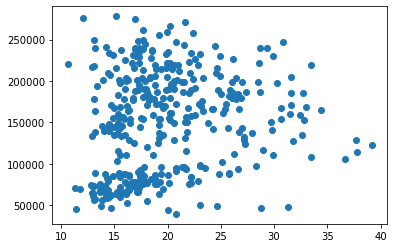

                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2022-01-01  1750504451  861372    426  5609      18198         102873
2022-01-02  1725934510  849240    840  5530      18156         143125
2022-01-03  1725944590  849240   1260  5530      18156         160430
2022-01-04  1725954670  849240   1680  5530      18156         157506
2022-01-05  1701153609  837108   2070  5451      17640         140767
...                ...     ...    ...   ...        ...            ...
2022-05-27  1703721882  800712  10692  5214      17142         230791
2022-05-28  1703731386  800712  11088  5214      17142         228266
2022-05-29  1703740890  800712  11484  5214      17142         190741
2022-05-30  1729639399  812844  12060  5293      17526         152333
2022-05-31  1729649047  812844  12462  5293      17526         187140

[151 rows x 6 columns]


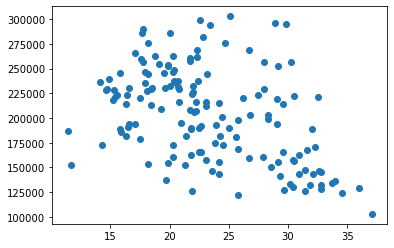

In [8]:
#Q2
#Let the daily overall pedestrian count be the total number of pedestrians counted by sensors on a particular day. 

#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
total_count = total_count_ped.groupby(['Date']).sum()
print(total_count)

#For each of 2021, 2022, generate a scatter plot of maximum temperature (x axis) and daily overall pedestrian count (y axis)
#merge pdcount3 with 
#inner_merged = pd.merge(pdcount3, temp2, on=["Date", "Date"])
#inner_merged.head()
#subset the year 


#Subset temp in year 2021. 

temp2021 = temp2.loc[(temp2['Date'] >= start_date1) & (temp2['Date'] <= end_date1)]
temp2021

#generate scatter plot of 2021
plt.scatter(temp2021['Maximum temperature (Degree C)'], total_count['Hourly_Counts'])
plt.show()


#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
total_count2 = total_count_ped2.groupby(['Date']).sum()
print(total_count2)

#subset the year 2022 from temp2

temp2022 = temp2.loc[(temp2['Date'] >= start_date2) & (temp2['Date'] <= end_date2)]
temp2022

#generate scatter plot of 2021
plt.scatter(temp2022['Maximum temperature (Degree C)'], total_count2['Hourly_Counts'])
plt.show()


                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2021-01-01  1400509375  812442    402  5293      15054         111288
2021-01-02  1401155791  812442    804  5293      15054         116635
2021-01-03  1380874374  800316   1188  5214      14844         111856
2021-01-04  1381501638  800316   1584  5214      14844         110840
2021-01-05  1403075743  812442   2010  5293      15054         125575
...                ...     ...    ...   ...        ...            ...
2021-12-27  1647660068  824568  11016  5372      16362         203460
2021-12-28  1647669860  824568  11424  5372      16362         226501
2021-12-29  1647679652  824568  11832  5372      16362         201829
2021-12-30  1647689444  824568  12240  5372      16362         164497
2021-12-31  1647699236  824568  12648  5372      16362         129047

[365 rows x 6 columns]


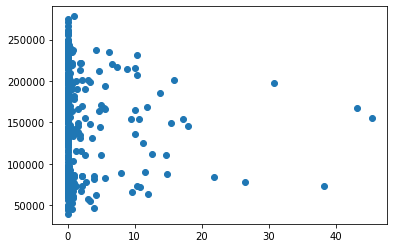

                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2022-01-01  1750504451  861372    426  5609      18198         102873
2022-01-02  1725934510  849240    840  5530      18156         143125
2022-01-03  1725944590  849240   1260  5530      18156         160430
2022-01-04  1725954670  849240   1680  5530      18156         157506
2022-01-05  1701153609  837108   2070  5451      17640         140767
...                ...     ...    ...   ...        ...            ...
2022-05-27  1703721882  800712  10692  5214      17142         230791
2022-05-28  1703731386  800712  11088  5214      17142         228266
2022-05-29  1703740890  800712  11484  5214      17142         190741
2022-05-30  1729639399  812844  12060  5293      17526         152333
2022-05-31  1729649047  812844  12462  5293      17526         187140

[151 rows x 6 columns]


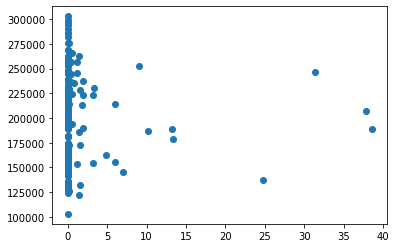

In [9]:
#Q3
#For each of 2021, 2022, generate a scatter plot of rainfall (x axis) and daily overall pedestrian count (y axis)


#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
total_count = total_count_ped.groupby(['Date']).sum()
print(total_count)

#Subset rain in year 2021. 

rain2021 = rain2.loc[(rain2['Date'] >= start_date1) & (rain2['Date'] <= end_date1)]
rain2021

#generate scatter plot of 2021
plt.scatter(rain2021['Rainfall amount (millimetres)'], total_count['Hourly_Counts'])
plt.show()


#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
total_count2 = total_count_ped2.groupby(['Date']).sum()
print(total_count2)

#subset the year 2022 from rain2

rain2022 = rain2.loc[(rain2['Date'] >= start_date2) & (rain2['Date'] <= end_date2)]
rain2022

#generate scatter plot of 2021
plt.scatter(rain2022['Rainfall amount (millimetres)'], total_count2['Hourly_Counts'])
plt.show()

#merge pdcount3 with rain2 
#inner_merged_rain = pd.merge(pdcount3, rain2, on=["Date", "Date"])
#inner_merged_rain.head()

                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2021-01-01  1400509375  812442    402  5293      15054         111288
2021-01-02  1401155791  812442    804  5293      15054         116635
2021-01-03  1380874374  800316   1188  5214      14844         111856
2021-01-04  1381501638  800316   1584  5214      14844         110840
2021-01-05  1403075743  812442   2010  5293      15054         125575
...                ...     ...    ...   ...        ...            ...
2021-12-27  1647660068  824568  11016  5372      16362         203460
2021-12-28  1647669860  824568  11424  5372      16362         226501
2021-12-29  1647679652  824568  11832  5372      16362         201829
2021-12-30  1647689444  824568  12240  5372      16362         164497
2021-12-31  1647699236  824568  12648  5372      16362         129047

[365 rows x 6 columns]


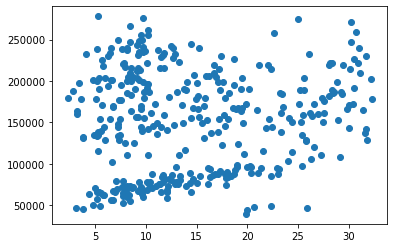

                    ID    Year  Mdate  Time  Sensor_ID  Hourly_Counts
Date                                                                 
2022-01-01  1750504451  861372    426  5609      18198         102873
2022-01-02  1725934510  849240    840  5530      18156         143125
2022-01-03  1725944590  849240   1260  5530      18156         160430
2022-01-04  1725954670  849240   1680  5530      18156         157506
2022-01-05  1701153609  837108   2070  5451      17640         140767
...                ...     ...    ...   ...        ...            ...
2022-05-27  1703721882  800712  10692  5214      17142         230791
2022-05-28  1703731386  800712  11088  5214      17142         228266
2022-05-29  1703740890  800712  11484  5214      17142         190741
2022-05-30  1729639399  812844  12060  5293      17526         152333
2022-05-31  1729649047  812844  12462  5293      17526         187140

[151 rows x 6 columns]


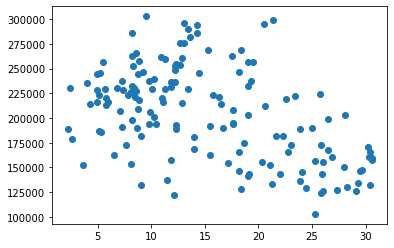

In [10]:
#Q4
#For each of 2021, 2022, generate a scatter plot of solar exposure (x axis) and daily overall pedestrian count (y axis)
#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
total_count = total_count_ped.groupby(['Date']).sum()
print(total_count)

#Subset rain in year 2021. 

solar2021 = solar2.loc[(solar2['Date'] >= start_date1) & (solar2['Date'] <= end_date1)]
solar2021

#generate scatter plot of 2021
plt.scatter(solar2021['Daily global solar exposure (MJ/m*m)'], total_count['Hourly_Counts'])
plt.show()


#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
total_count2 = total_count_ped2.groupby(['Date']).sum()
print(total_count2)

#subset the year 2022 from solar

solar2022 = solar2.loc[(solar2['Date'] >= start_date2) & (solar2['Date'] <= end_date2)]
solar2022

#generate scatter plot of 2021
plt.scatter(solar2022['Daily global solar exposure (MJ/m*m)'], total_count2['Hourly_Counts'])
plt.show()



                     ID           Year        Mdate         Time  \
Day                                                                
Friday     1.539094e+09  822966.452830  6362.037736  5361.566038   
Monday     1.539529e+09  822935.653846  6300.461538  5361.365385   
Saturday   1.540227e+09  823868.423077  6430.038462  5367.442308   
Sunday     1.536415e+09  821536.500000  6577.500000  5352.250000   
Thursday   1.543266e+09  824334.807692  6322.384615  5370.480769   
Tuesday    1.541471e+09  824101.615385  6466.269231  5368.961538   
Wednesday  1.542479e+09  824334.807692  6395.423077  5370.480769   

              Sensor_ID  Hourly_Counts  
Day                                     
Friday     15852.226415  155341.849057  
Monday     15866.653846  140364.519231  
Saturday   15872.423077  155440.038462  
Sunday     15832.846154  136559.442308  
Thursday   15896.884615  159654.538462  
Tuesday    15896.538462  151352.000000  
Wednesday  15912.346154  157539.769231  


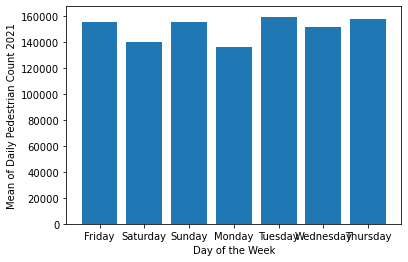

                     ID          Year         Time     Sensor_ID  \
Day                                                                
Friday     2.087314e+09  1.003388e+06  6533.764706  21123.529412   
Monday     2.066948e+09  9.941500e+05  6473.611111  20967.666667   
Saturday   2.068624e+09  9.954980e+05  6482.388889  20976.666667   
Sunday     2.066840e+09  9.941500e+05  6473.611111  20965.333333   
Thursday   2.084767e+09  1.002674e+06  6529.117647  21117.882353   
Tuesday    2.063564e+09  9.914540e+05  6456.055556  20902.333333   
Wednesday  2.084775e+09  1.002674e+06  6529.117647  21126.000000   

           Hourly_Counts  
Day                       
Friday     262861.705882  
Monday     225361.000000  
Saturday   274330.666667  
Sunday     231216.777778  
Thursday   262160.000000  
Tuesday    244203.277778  
Wednesday  254720.823529  


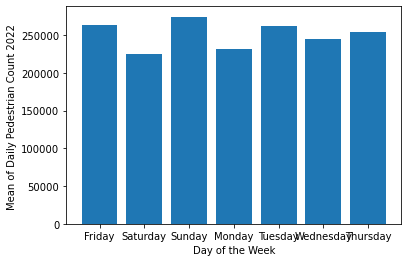

In [29]:
#5. For each of 2021, 2022, generate a histogram showing how busy (mean daily overall pedestrian count y axis) each day of the week (x axis) is.

#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
total_sum = total_count_ped.groupby(['Date', 'Day']).sum()
total_mean = total_sum.groupby(['Day']).mean()
print(total_mean)


day_of_week = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

#plot histogram of 2021
plt.bar(day_of_week,total_mean['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2021')
plt.xlabel('Day of the Week')
plt.show()

#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
total_sum2022 = total_count_ped2.groupby(['Mdate', 'Day']).sum()
total_mean2022 = total_sum2022.groupby(['Day']).mean()
print(total_mean2022)

#Plot Histogram of 2022
plt.bar(day_of_week,total_mean2022['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2022 ')
plt.xlabel('Day of the Week')
plt.show()

                     ID     Year       Mdate  Time  Hourly_Counts
Sensor_ID                                                        
1          2.512140e+07  12132.0   93.735099  79.0    7345.245033
2          2.511705e+07  12132.0   93.735099  79.0    4708.225166
3          2.512576e+07  12132.0   93.735099  79.0    7320.516556
4          2.495355e+07  12132.0   93.150000  79.0    9722.525000
5          2.519129e+07  12132.0   93.735099  79.0    7933.231788
6          2.517386e+07  12132.0   93.735099  79.0    7081.966887
7          2.458189e+07  12132.0  107.111111  79.0    1505.703704
8          2.516436e+07  12132.0   93.735099  79.0    1471.145695
9          2.512424e+07  12132.0   89.314286  79.0    2678.935714
10         2.515129e+07  12132.0   93.735099  79.0     570.066225
11         2.516000e+07  12132.0   93.735099  79.0    1074.072848
12         2.515565e+07  12132.0   93.735099  79.0    1703.973510
14         2.520000e+07  12132.0   93.735099  79.0    2424.013245
17        

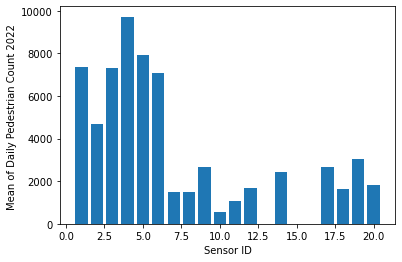

In [33]:
#6. For 2022, generate a histogram showing the mean daily overall pedestrian count (y axis) for sensors 1-20 (x axis).

#total pedestrian count for 2021
#start_date1 = '2021-01-01'
#end_date1 = '2021-12-31'
#total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
#sensors_2021 = total_count_ped.loc[(total_count_ped['Sensor_ID'] >= 1) & (total_count_ped['Sensor_ID'] <= 20)]
#total_sum_sensors = sensors_2021.groupby(['Date', 'Sensor_ID']).sum()
#total_mean_sensors = total_sum_sensors.groupby(['Sensor_ID']).mean()
#print(total_mean_sensors)

#sensor_Id_2021 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20]

#plot histogram of 2021
#plt.bar(sensor_Id_2021,total_mean_sensors['Hourly_Counts'], align='center') # A bar chart
#plt.ylabel('Mean of Daily Pedestrian Count 2021')
#plt.xlabel('Sensor ID')
#plt.show()

#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
sensors_2022 = total_count_ped2.loc[(total_count_ped2['Sensor_ID'] >= 1) & (total_count_ped2['Sensor_ID'] <= 20)]
total_sum_sensors22 = sensors_2022.groupby(['Date', 'Sensor_ID']).sum()
total_mean_sensors_2022 = total_sum_sensors22.groupby(['Sensor_ID']).mean()
print(total_mean_sensors_2022)

sensor_Id_2022 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20]
#Plot Histogram of 2022
plt.bar(sensor_Id_2022,total_mean_sensors_2022['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2022 ')
plt.xlabel('Sensor ID')
plt.show()


Day_x
Friday       158445.962963
Monday       140735.400000
Saturday     146843.631579
Sunday       121318.434783
Thursday     125157.631579
Tuesday      139844.450000
Wednesday    148239.150000
Name: Hourly_Counts, dtype: float64


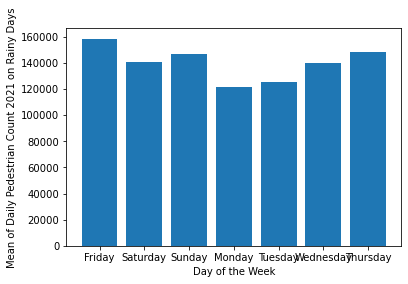

Day_x
Friday       194690.166667
Monday       198609.500000
Saturday     204002.500000
Sunday       202829.333333
Thursday     207487.166667
Tuesday      214955.833333
Wednesday    216698.000000
Name: Hourly_Counts, dtype: float64


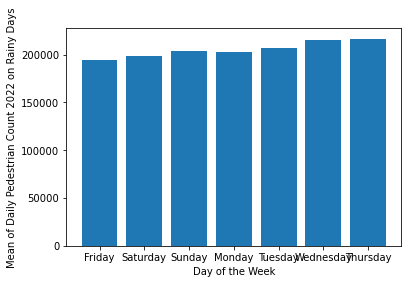

In [41]:
#7. Same as Q5, but in the calculation only include days where it rained.
#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]

#Subset Rain Data into 2021
#Subset data into the wanted date. 
mask = (rain['Date'] >= start_date1) & (rain['Date'] <= end_date1)
rain3 = rain.loc[mask]

#Join two tables
inner_merged = pd.merge(total_count_ped, rain3, on=["Date", "Date"])

#get days where it rained
rainy_day = inner_merged.loc[(inner_merged['Rainfall amount (millimetres)'] > 0)]
rainy_day

total_sum_rain= rainy_day.groupby(['Date', 'Day_x']).sum()
total_mean_rain= total_sum_rain.groupby(['Day_x']).mean()
print(total_mean_rain['Hourly_Counts'])

day_of_week = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

#plot histogram of 2021
plt.bar(day_of_week,total_mean_rain['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2021 on Rainy Days')
plt.xlabel('Day of the Week')
plt.show()

#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]


#Subset Rain Data into 2022
mask = (rain['Date'] >= start_date2) & (rain['Date'] <= end_date2)
rain4 = rain.loc[mask]

#Join two tables
inner_merged_2 = pd.merge(total_count_ped2, rain4, on=["Date", "Date"])

#get days where it rained
rainy_day_2022 = inner_merged_2.loc[(inner_merged_2['Rainfall amount (millimetres)'] > 0)]
rainy_day_2022

total_sum_rain_2022= rainy_day_2022.groupby(['Date', 'Day_x']).sum()
total_mean_rain_2022= total_sum_rain_2022.groupby(['Day_x']).mean()
print(total_mean_rain_2022['Hourly_Counts'])


#plot histogram of 2021
plt.bar(day_of_week,total_mean_rain_2022['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2022 on Rainy Days')
plt.xlabel('Day of the Week')
plt.show()



Day_x
Friday       161290.307692
Monday       140735.400000
Saturday     154449.562500
Sunday       121318.434783
Thursday     123455.222222
Tuesday      136806.736842
Wednesday    148239.150000
Name: Hourly_Counts, dtype: float64


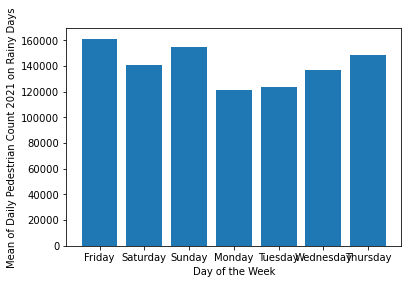

Day_x
Friday       194690.166667
Monday       198609.500000
Saturday     213073.500000
Sunday       202829.333333
Thursday     207487.166667
Tuesday      214955.833333
Wednesday    216698.000000
Name: Hourly_Counts, dtype: float64


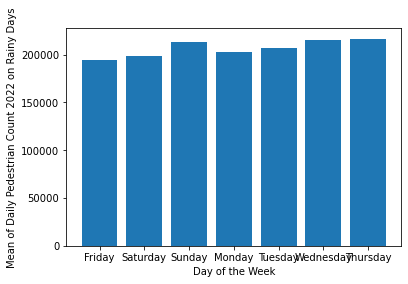

In [46]:
#8. Same as Q5, but in the calculation only include days where the maximum temperature was less than 20 and it rained.

#total pedestrian count for 2021
start_date1 = '2021-01-01'
end_date1 = '2021-12-31'
total_count_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]

#Subset Rain Data into 2021
#Subset data into the wanted date. 
mask = (rain['Date'] >= start_date1) & (rain['Date'] <= end_date1)
rain3 = rain.loc[mask]

#Join two tables
inner_merged = pd.merge(total_count_ped, rain3, on=["Date", "Date"])

#get days where it rained
rainy_day = inner_merged.loc[(inner_merged['Rainfall amount (millimetres)'] > 0) & (inner_merged['Rainfall amount (millimetres)'] < 20)]
rainy_day

total_sum_rain= rainy_day.groupby(['Date', 'Day_x']).sum()
total_mean_rain= total_sum_rain.groupby(['Day_x']).mean()
print(total_mean_rain['Hourly_Counts'])

day_of_week = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

#plot histogram of 2021
plt.bar(day_of_week,total_mean_rain['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2021 on Rainy Days')
plt.xlabel('Day of the Week')
plt.show()

#subset the year 2022 from pdcount
start_date2 = '2022-01-01'
end_date2 = '2022-05-31'
total_count_ped2 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]


#Subset Rain Data into 2022
mask = (rain['Date'] >= start_date2) & (rain['Date'] <= end_date2)
rain4 = rain.loc[mask]

#Join two tables
inner_merged_2 = pd.merge(total_count_ped2, rain4, on=["Date", "Date"])

#get days where it rained
rainy_day_2022 = inner_merged_2.loc[(inner_merged_2['Rainfall amount (millimetres)'] > 0)& (inner_merged_2['Rainfall amount (millimetres)'] < 20)]
rainy_day_2022

total_sum_rain_2022= rainy_day_2022.groupby(['Date', 'Day_x']).sum()
total_mean_rain_2022= total_sum_rain_2022.groupby(['Day_x']).mean()
print(total_mean_rain_2022['Hourly_Counts'])


#plot histogram of 2021
plt.bar(day_of_week,total_mean_rain_2022['Hourly_Counts'], align='center') # A bar chart
plt.ylabel('Mean of Daily Pedestrian Count 2022 on Rainy Days')
plt.xlabel('Day of the Week')
plt.show()


In [110]:
#9. Consider the time series of the daily overall pedestrian count for each sensor in May 2021 and in May 2022. 
#Comparing these two months, which sensor’s time series changed the most and by how much? [you should use Euclidean distance to compare two time series]

#total pedestrian count for may 2021
start_date1 = '2021-05-01'
end_date1 = '2021-05-31'
total_maycount_ped = pdcount3.loc[(pdcount3['Date'] >= start_date1) & (pdcount3['Date'] <= end_date1)]
total_sensor_count = total_maycount_ped.groupby(['Mdate','Sensor_ID']).sum()
print(total_sensor_count['Hourly_Counts'])


#total pedestrian count for may 2022
start_date2 = '2022-05-01'
end_date2 = '2022-05-31'
total_maycount_ped2022 = pdcount3.loc[(pdcount3['Date'] >= start_date2) & (pdcount3['Date'] <= end_date2)]
total_sensor_count2022 = total_maycount_ped2022.groupby(['Mdate','Sensor_ID']).sum()
print(total_sensor_count2022['Hourly_Counts'])

import math
inner_merged_3 = pd.merge(total_sensor_count2022, total_sensor_count, on=["Mdate", "Sensor_ID"])

#convert hourly counts to list to find euclidian distance
list_a = inner_merged_3['Hourly_Counts_y'].values.tolist()


list_b = inner_merged_3['Hourly_Counts_x'].values.tolist()


#loop and subtract each item in list a and b

    
#inner_merged_3['Euclidian Distance'] = math.sqrt(((for i in list_a)-(for i in list_b))**2)
#inner_merged_3
distance = []
for i in range(0, len(list_a)):
    distance.append(math.sqrt((list_a[i]-list_b[i])**2))
    


inner_merged_3['Euclidian Distance'] = distance


inner_merged_3.loc[inner_merged_3['Euclidian Distance'].idxmax()] 


Mdate  Sensor_ID
1      1            10798
       2             5407
       3             4771
       4            10852
       5            11015
                    ...  
31     72             528
       75             228
       76             701
       77            1419
       78             207
Name: Hourly_Counts, Length: 2094, dtype: int64
Mdate  Sensor_ID
1      1            8466
       2            5349
       3            7781
       5            7143
       6            6132
                    ... 
31     78            238
       79           3447
       84           7775
       85            771
       86            480
Name: Hourly_Counts, Length: 2005, dtype: int64


ID_x                  25841917.0
Year_x                   12132.0
Time_x                      79.0
Hourly_Counts_x          15158.0
ID_y                  22219759.0
Year_y                   12126.0
Time_y                      79.0
Hourly_Counts_y           2739.0
Euclidian Distance       12419.0
Name: (28, 41), dtype: float64